# CLASE 3.5: UNA INTRODUCCIÓN A SEABORN
---

Hasta ahora, **Matplotlib** ha probado ser una herramienta tremendamente útil para la visualización de información en todos sus niveles. Hemos aprendido a crear básicamente cualquier tipo de visualización que posiblemente necesitemos (y las que no, de seguro que nos será sencillo aprenderlas al leer la documentación de **Matplotlib**). Sin embargo, incluso los usuarios más ávidos de **Matplotlib** admitirán que, con frecuencia, la librería se queda corta en varias aplicaciones:

- Previo a la versión 2.0, las opciones por defecto de **Matplotlib** para la reportabilidad estaban lejos de ser óptimas.
- La API de diseño de **Matplotlib** está lejos de ser de alto nivel, dada la enorme cantidad de código que muchas veces necesitamos para construir gráficos realmente sofisticados.
- **Matplotlib**, durante mucho tiempo, fue una librería cuyos desarrolladores se negaron a crear funcionalidades dedicadas para objetos de **Pandas** como series y DataFrames. Por esa razón, **Pandas** tiene su propia API de graficación con base en **Matplotlib**. Otras librerías hacen uso de los índices de las series y DataFrames para ahorrarnos mucho trabajo en la rotulación de ejes e incluso de títulos y leyendas.

## La librería Seaborn.
Una librería más robusta en este tipo de situaciones es **Seaborn**, la que cuenta con una API construida sobre **Matplotlib** que ofrece elecciones por defecto bastante buenas para la reportabilidad de información, funciones de graficación de muy alto nivel para visualización típica de distribuciones estadísticas de alta complejidad, e integra la funcionalidad de series y DataFrames de **Pandas** en su propia API.

Vamos a ejemplificar la diferencia en las opciones por defecto de **Matplotlib** relativas a las propuestas por **Seaborn** utilizando, para ello, el gráfico de un [paseo aleatorio](https://en.wikipedia.org/wiki/Random_walk). Partimos con las típicas importaciones de librerías:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from IPython.core.display import HTML

In [3]:
# Setting de parámetros de graficación.
plt.rcParams["figure.dpi"] = 150 # Resolución de nuestras figuras.

In [4]:
# Centramos el output de los gráficos en este notebook.
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Ahora crearemos algo de data para graficar:

In [5]:
rng = np.random.default_rng(7)
x = np.linspace(start=0, stop=100, num=1000)
y = np.cumsum(rng.normal(loc=0, scale=1, size=(1000, 6)), 0)

Y generamos un gráfico de esta data con las opciones por defecto de **Matplotlib**:

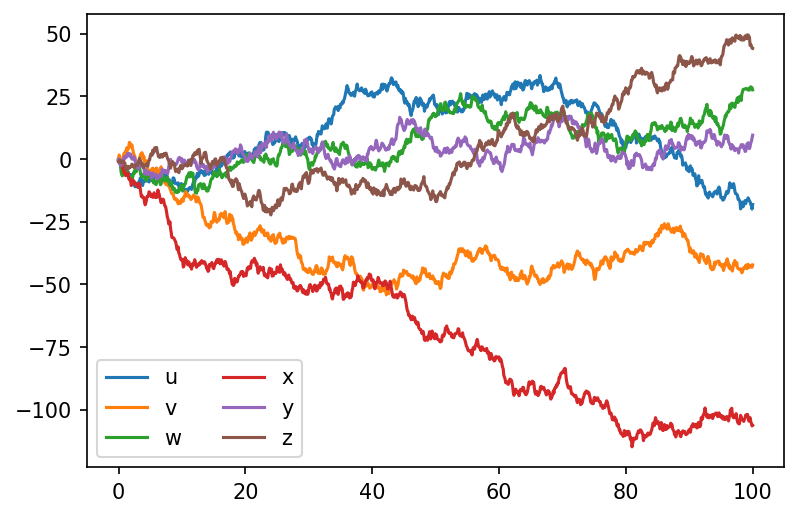

In [6]:
# Construimos nuestro gráfico.
plt.plot(x, y)
plt.legend('uvwxyz', ncol=2, loc='lower left');

A pesar de que este resultado muestra información que realmente queremos comunicar, lo hace de manera tal que la reportabilidad de dicha información, quizás, no sea estéticamente adecuada. E incluso podríamos decir (con toda responsabilidad) que es probablemente un poco anticuada para los estándares de visualización actuales.

Ahora echemos un vistazo a cómo trabaja **Seaborn**. Como veremos más adelante, **Seaborn** tiene sus propias rutinas de graficación de alto nivel, pero también tiene la capacidad de sobreescribir los parámetros de configuración por defecto de **Matplotlib** y, de esta manera, convertir el gráfico más simple de **Matplotlib** en una imagen estéticamente muy superior en calidad. Esta piel de **Seaborn** puede setearse rápidamente mediante la función `set()` al inicio de nuestra sesión. Por convención, además, **Seaborn** suele impotarse bajo el prefijo `sns`:

In [7]:
import seaborn as sns

In [8]:
# Activamos el template de estilos de Seaborn para todos los gráficos.
sns.set()

Ahora construyamos el mismo gráfico anterior con las mismas dos líneas de código, y veamos como resulta:

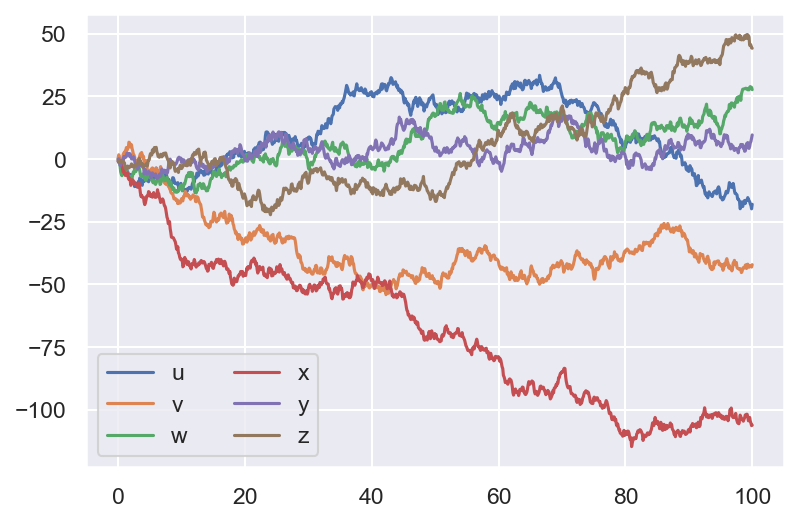

In [9]:
# Mismo gráfico, pero con la piel de Seaborn.
plt.plot(x, y)
plt.legend('uvwxyz', ncol=2, loc='lower left');

Observamos que ahora el gráfico, por defecto, se ve mucho mejor.

La idea general de **Seaborn** es proveernos de una API de alto nivel para crear una generosa variedad de gráficos útiles para todo tipo de tareas.

Echaremos, por tanto, un vistazo a algunos de los gráficos y visualizaciones disponibles en **Seaborn** y que son especialmente útiles por su complejidad a bajo costo de código. Notemos que todos estos gráficos pueden ser construidos utilizando **Matplotlib** (esto es, de hecho, lo que **Seaborn** hace tras bambalinas), pero la API de **Seaborn** resulta mucho más conveniente de utilizar.

### Visualización de distribuciones de frecuencias.
Con frecuencia en la visualización de data de naturaleza estadística, lo que más necesitamos es graficar histogramas y distribuciones conjuntas de variables aleatorias. Hemos visto antes que los gráficos de este tipo son relativamente fáciles de construir en **Matplotlib**:

In [10]:
# Creamos data a partir de una distribución normal multivariable.
mean = np.array([0, 0])
cov = np.array([[6, 1], [1, 2]])
data = pd.DataFrame(
    data=np.random.multivariate_normal(mean=mean, cov=cov, size=2000),
    columns=["X", "Y"]
)

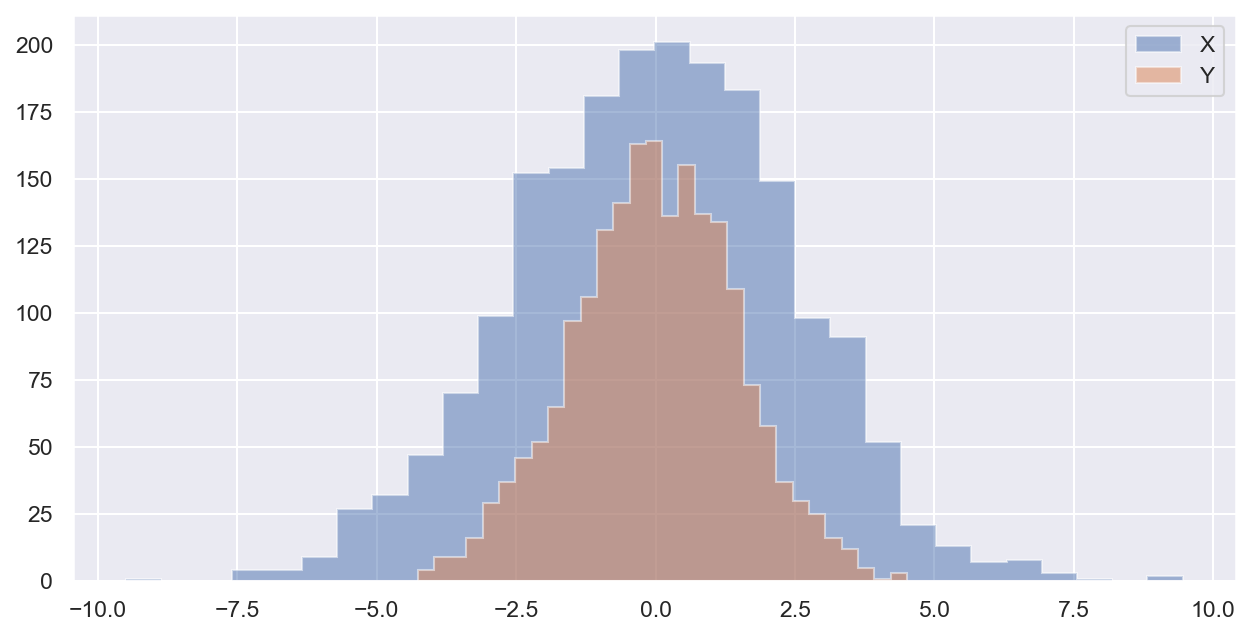

In [11]:
# Creamos el histograma para ambas variables.
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(data["X"], alpha=0.5, histtype="stepfilled", bins=30, label="X")
ax.hist(data["Y"], alpha=0.5, histtype="stepfilled", bins=30, label="Y")
ax.legend();

En vez de un histograma, podemos generar una estimación regularizada (suave) de las funciones de densidad de probabilidad asociadas a las distribuciones observadas de la data. Este procedimiento se conoce como *estimación de densidad vía funciones de Kernel* (Kernel Density Estimation o **KDE**). En **Matplotlib**, construir un gráfico de ese tipo puede llegar a resultar en una verdadera odisea (aunque posible, sin duda). En **Seaborn**, esto puede lograrse fácilmente mediante el uso de la función `sns.kdeplot()`, la que únicamente require de el o los arreglos de datos que representen observaciones o muestreos relativos a una variable:

<AxesSubplot:xlabel='X', ylabel='Density'>

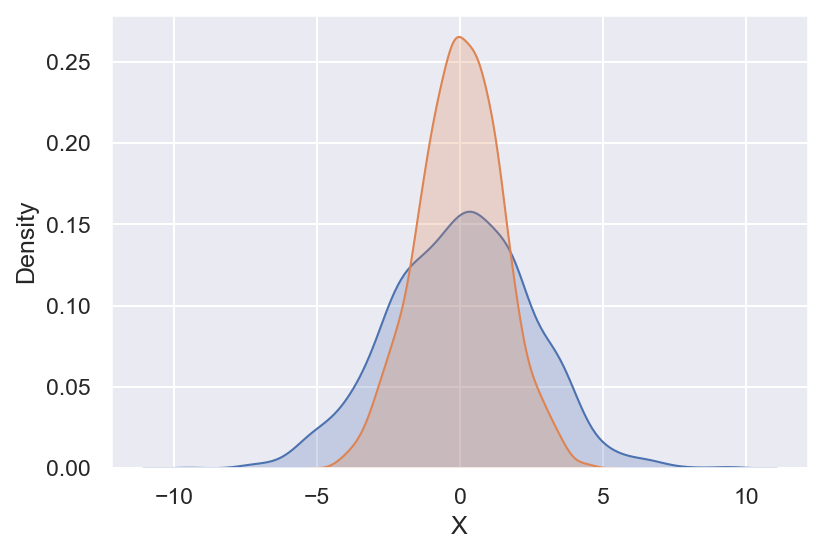

In [12]:
# Gráfico de densidades vía Seaborn.
sns.kdeplot(data["X"], shade=True)
sns.kdeplot(data["Y"], shade=True)

En el gráfico anterior, podemos observar que **Seaborn** ha etiquetado automáticamente los ejes del gráfico, tomo como referencia el nombre de la primera columna del DataFrame (`"X"`) y la palabra `Density` para los ejes X e Y, respectivamente. Podemos hacer uso de **Matplotlib** para referenciar y corregir estas etiquetas, usando la interfaz orientada a objetos:

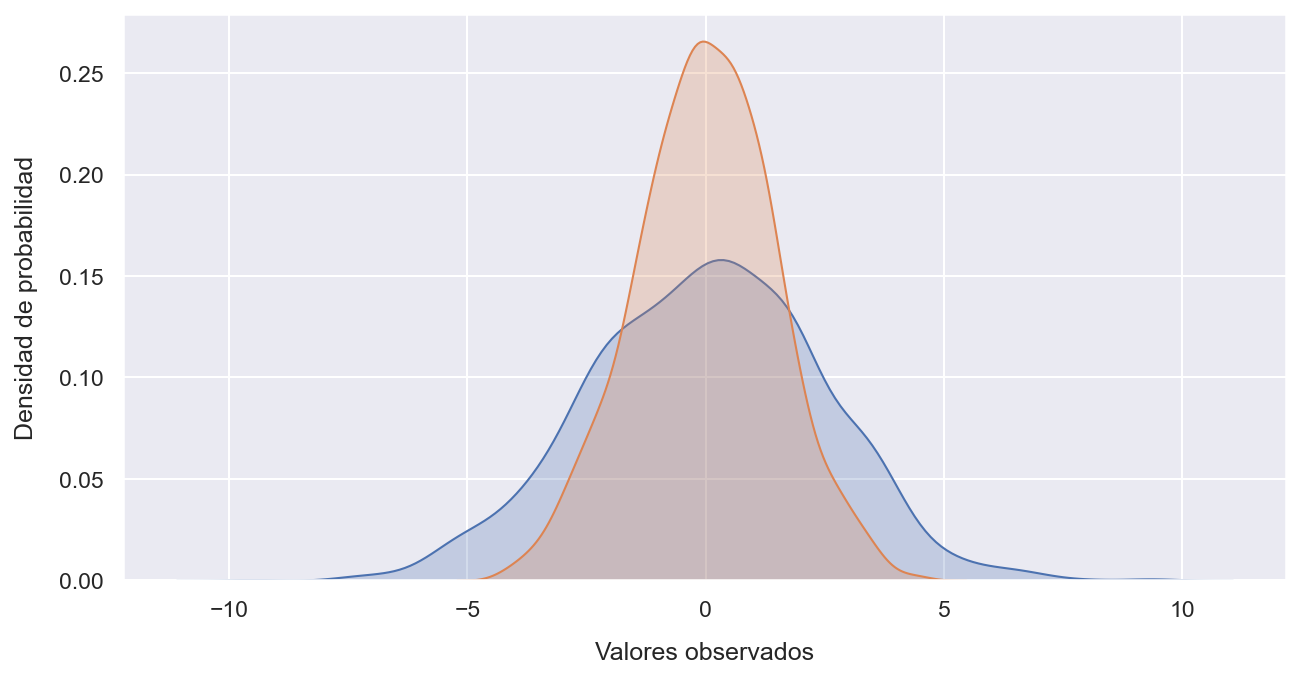

In [13]:
# Usamos Matplotlib para referenciar todo correctamente.
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(data["X"], shade=True, ax=ax)
sns.kdeplot(data["Y"], shade=True, ax=ax)
ax.set_xlabel("Valores observados", fontsize=12, labelpad=10)
ax.set_ylabel("Densidad de probabilidad", fontsize=12, labelpad=10);

**Seaborn**, como vemos, puede reconocer inmediatamente la estructura subyacente de la data que imputamos. En este caso, si la data a trabajar es un DataFrame, la función `sns.kdeplot()` puede hacer uso de los rótulos de columna asociados al mismo para graficar la data:

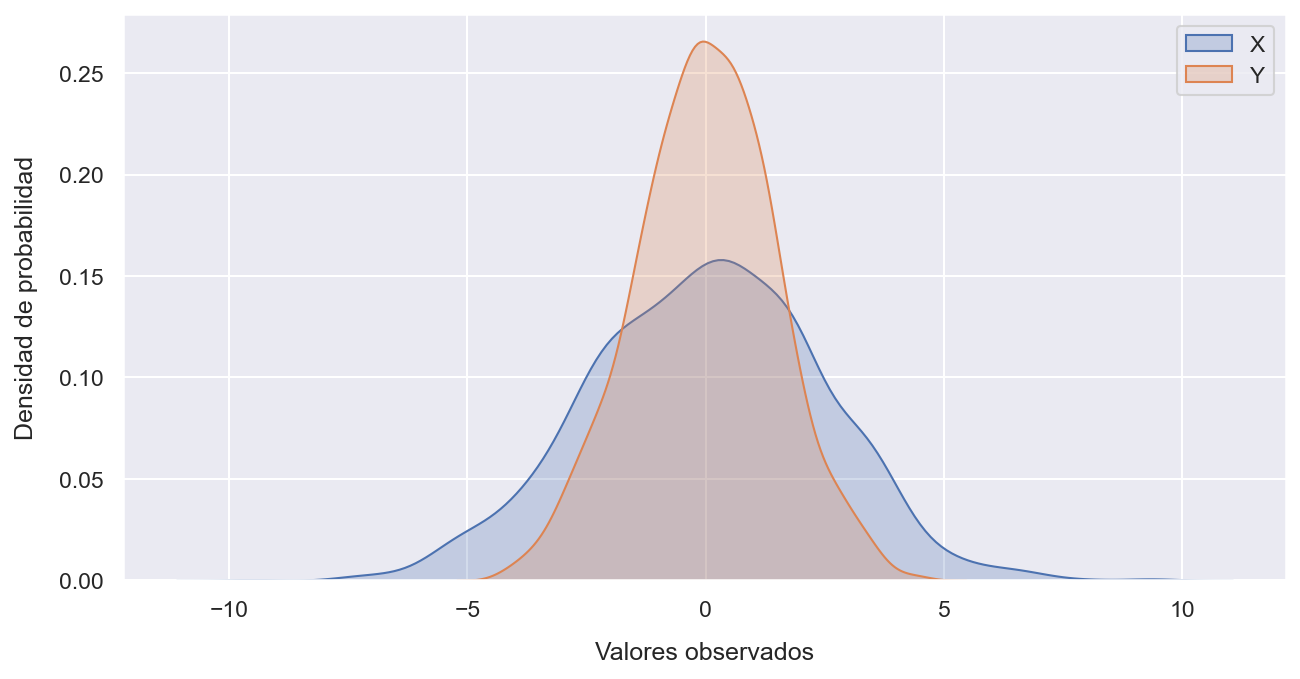

In [14]:
# Seaborn puede aprovechar las características inherentes a un DataFrame.
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(data=data, x="X", fill=True, ax=ax, label="X")
sns.kdeplot(data=data, x="Y", fill=True, ax=ax, label="Y")
ax.set_xlabel("Valores observados", fontsize=12, labelpad=10)
ax.set_ylabel("Densidad de probabilidad", fontsize=12, labelpad=10)
ax.legend();

**Ejemplo 4.1 - Caracterización estadística rápida de mineral alimentado a una planta concentradora:** Vamos a hacer uso del archivo `feeding_ore.csv` para observar algunas opciones de graficación interesantes de la función `sns.kdeplot()` en términos relativos al análisis estadístico. Partiremos pues accediendo a esta información:

In [15]:
# Accedemos a la data.
data = pd.read_csv("datasets/feeding_ore.csv", sep=";")

In [16]:
# Observamos las primeras filas de esta data.
data.head(n=10)

,Fecha,Ley Cu,Ley Fe,Ley CuS,Razon Solubilidad,Recuperacion,Contenido Arcillas,Dureza Mineral
0,01-01-17,0.551644,0.91,0.040491,7.340001,83.624430,Media,Baja
1,02-01-17,0.627278,0.87,0.039976,6.372893,83.977976,Media,Baja
2,03-01-17,0.516193,0.91,0.056540,10.953222,84.596316,Media,Baja
3,04-01-17,0.526619,0.85,0.055908,10.616376,86.941750,Media,Media
4,05-01-17,0.522008,1.00,0.049271,9.438724,86.063811,Alta,Media
5,06-01-17,0.516029,1.00,0.044514,8.626333,85.074389,Media,Baja
6,07-01-17,0.548279,1.01,0.051611,9.413342,86.506552,Media,Baja
7,08-01-17,0.500921,1.10,0.048085,9.599382,86.008049,Alta,Baja
8,09-01-17,0.496137,1.10,0.047364,9.546477,86.104478,Media,Baja
9,10-01-17,0.529399,1.00,0.049751,9.397655,84.953976,Alta,Baja


El DataFrame al que hemos accedido está compuesto por información relativa a más de 5 años de datos relativos a la alimentación diaria a una planta concentradora. La data, en este caso, nos permite caracterizar el comportamiento esperado, sobretodo, del proceso de flotación, debido a que disponemos de información relativa a leyes, razón de solubilidad (que es la fracción entre cobre soluble y cobre total entranta a la planta, expresada como un porcentaje) y el contenido de arcillas, que impacta directamente en el consumo de agua resultante del proceso.

La función `sns.kdeplot()` nos permite estimar rápidamente la densidad conjunta observada entre un par de variables. Para ello, basta que el DataFrame completo se pase al argumento `data`, especificando en los parámetros `x` e `y` los rótulos de columna asociados a las variables que queremos graficar:

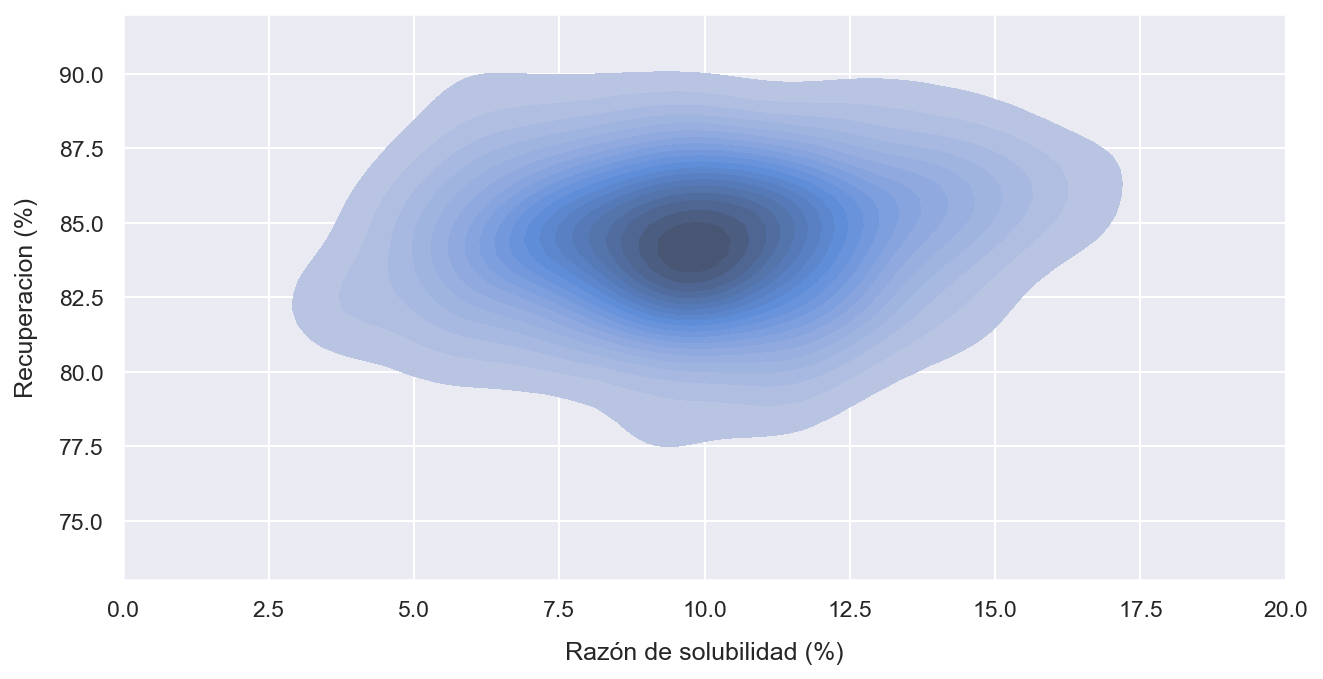

In [17]:
# Estimacion de densidad conjunta.
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(data=data, x="Razon Solubilidad", y="Recuperacion", fill=True, ax=ax, levels=20)
ax.set_xlabel("Razón de solubilidad (%)", fontsize=12, labelpad=10)
ax.set_ylabel("Recuperacion (%)", fontsize=12, labelpad=10)
ax.set_xlim(0, 20)
ax.set_ylim(73, 92);

Es posible generar una estimacion diferenciada de la densidad observada conjunta de un par de variables relativa a una determinada variable categórica (siempre que ésta exista). Para ello, debemos asignar el rótulo de dicha variable al parámetro `hue`:

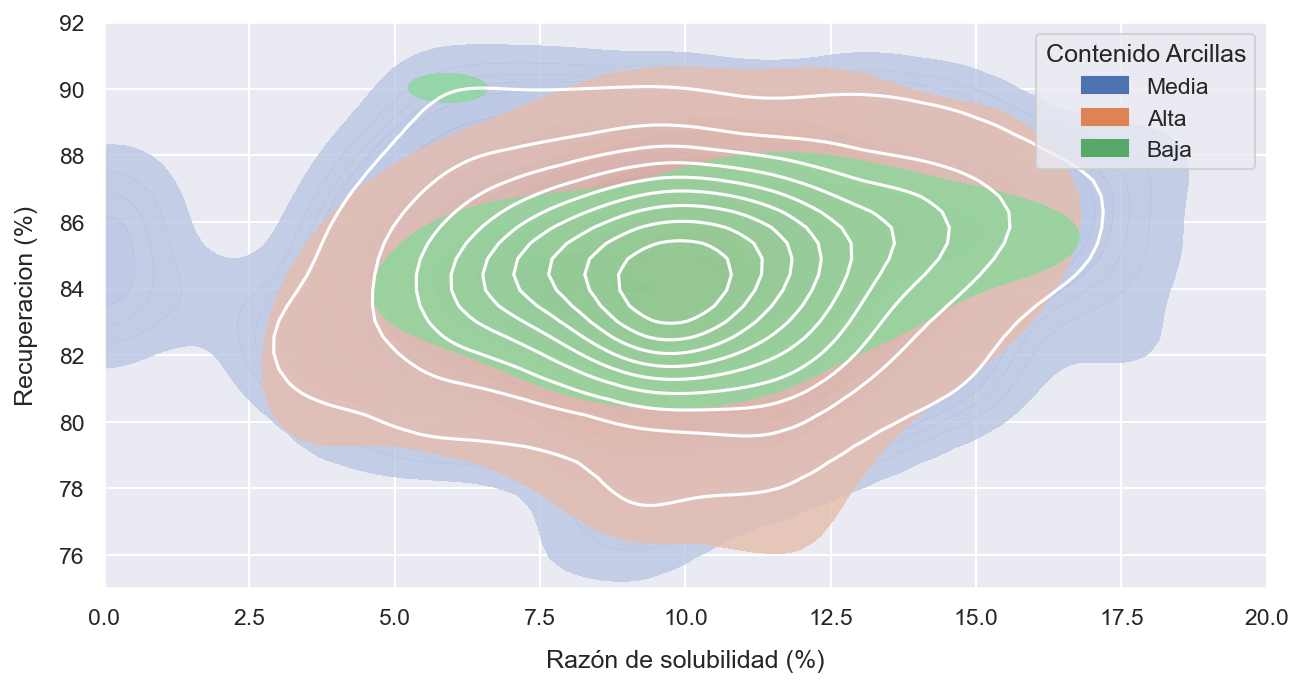

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(
    data=data, x="Razon Solubilidad", y="Recuperacion", 
    hue="Contenido Arcillas", fill=True, ax=ax, levels=20, alpha=0.8
)
sns.kdeplot(data=data, x="Razon Solubilidad", y="Recuperacion", ax=ax, levels=10, color="w")
ax.set_xlabel("Razón de solubilidad (%)", fontsize=12, labelpad=10)
ax.set_ylabel("Recuperacion (%)", fontsize=12, labelpad=10)
ax.set_xlim(0, 20)
ax.set_ylim(75, 92);

Notemos además que el parámetro `levels` permite especificar el número de niveles a mostrar en la densidad estimada mostrada en el gráfico (lo que es simil al número de barras en un histograma).

El gráfico nos permite concluir rápidamente que las menores variabilidades de recuperación esperada en el proceso están asociadas a razones de solubilidad sobre 5%, las que son bastante altas para el común de una planta concentradora y que están asociadas mayormente a un contenido bajo de arcillas. Es interesante observar que las recuperaciones reales suelen verse reducidas al aumentar la razón de solubilidad. El contenido de arcillas suele impactar los consumos de agua en una planta concentradora, así que es muy probable que esta data simplemente haya sido estimada a partir de un modelo de bloques, y sean simplemente valores esperados conforme las mediciones realizadas sobre el mineral cargado y transportado desde la mina (muy probablemente, una operación a cielo abierto).

La visualización de las densidades conjuntas puede mejorarse mediante la utilización de la función `sns.jointplot()`, la cual, además de mostrar la función de densidad conjunta, también permite dibujar los histogramas relativos a las distribuciones marginales observadas para cada variable. En este caso, podemos controlar los límites asociados al gráfico usando los parámetros `xlim` e `ylim`, los que aceptan tuplas:

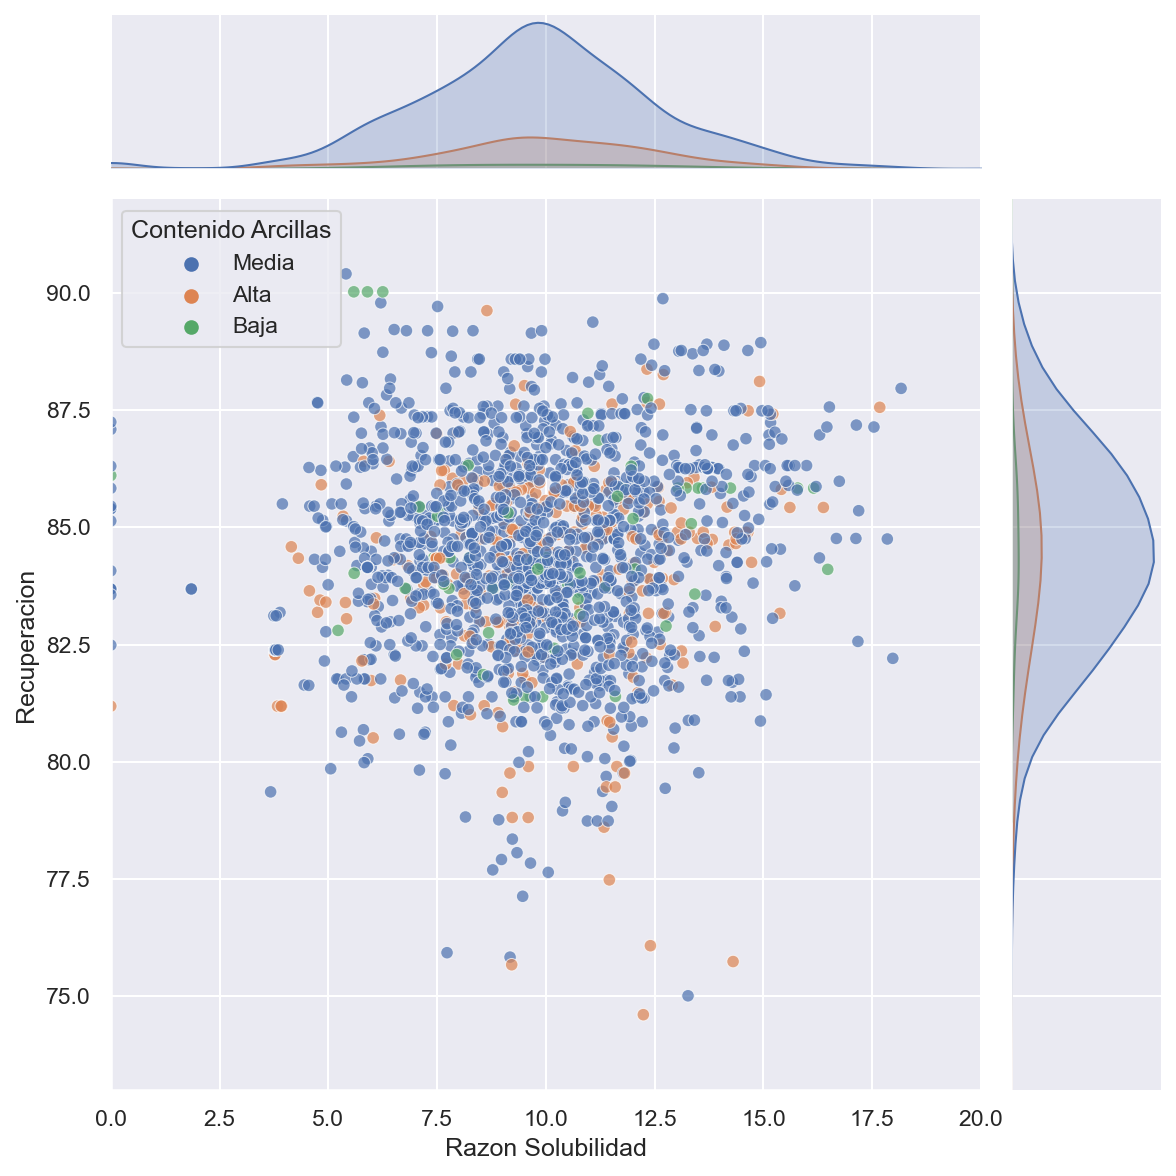

In [19]:
# Estimacion de densidad conjunta, gráfico tipo "jointplot".
sns.jointplot(
    data=data, x="Razon Solubilidad", y="Recuperacion", hue="Contenido Arcillas",
    xlim=(0, 20), ylim=(73, 92), alpha=0.7, height=8, joint_kws={"alpha": 0.5}
);

En el gráfico anterior, el parámetro `height` controla el tamaño de la figura completa.

Es posible acoplar otro gráfico a un *jointplot* asignando el primer a alguna variable, y luego aplicando el método `plot_joint()`, usando como primer argumento el gráfico que queremos acoplar. Ejemplificaremos ésto acoplando una estimación de densidad conjunta sobre el gráfico de dispersión que hemos comnstruido mediante la función `sns.kdeplot()`:

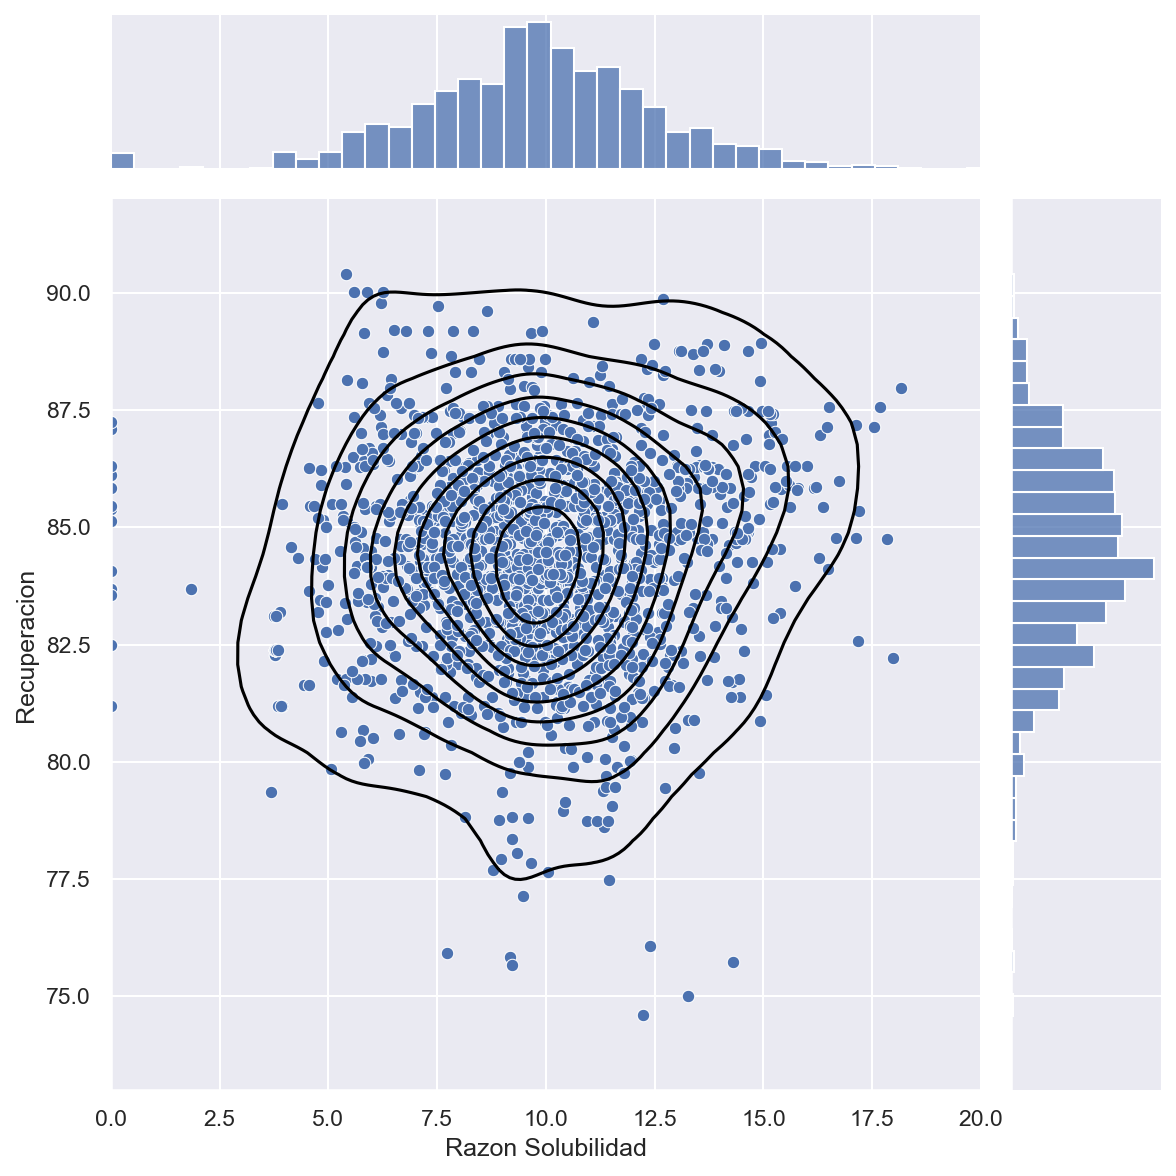

In [20]:
p = sns.jointplot(data=data, x="Razon Solubilidad", y="Recuperacion", xlim=(0, 20), ylim=(73, 92), height=8)
p.plot_joint(sns.kdeplot, levels=10, color="black");

Es posible también construir grillas que permitan subdividir nuestra data conforme una o variables categóricas, conforme algún tipo de gráfico en particular. Para ello, podemos usar la clase `sns.FacetGrid()`, en la cual podemos establecer la variable categórica a mostrar en filas o columnas de la grilla, referenciada por medio de sus correspondientes rótulos de columna, en los parámetros `row` y `col`, respecivamente. Podemos además establecer los límites numéricos a mostrar en cada eje de los gráficos resultantes, y los títulos que caracterizan a cada uno (usando, en este último caso, el parámetro Booleano `margin_titles`):

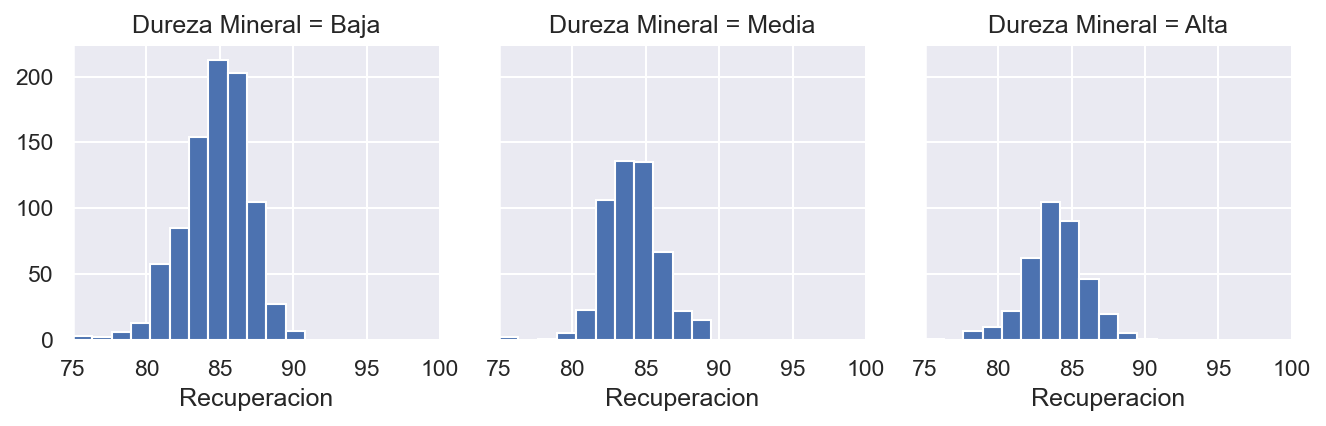

In [21]:
# Grilla con tres columnas, con histogramas.
grid = sns.FacetGrid(data, col="Dureza Mineral", margin_titles=True, xlim=(75, 100))
grid.map(plt.hist, "Recuperacion", bins=np.linspace(start=75, stop=100, num=20));

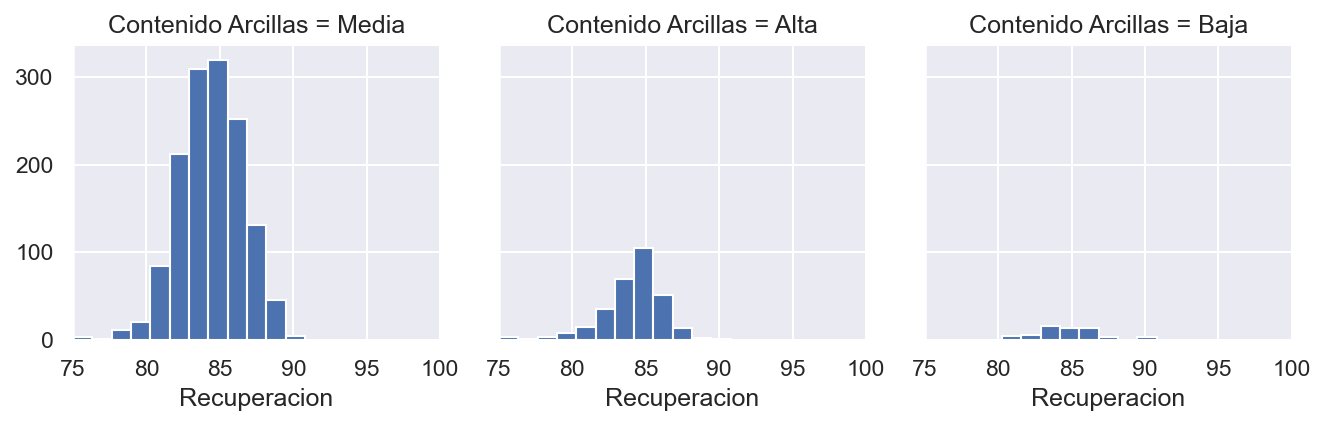

In [22]:
# Otra grilla con tres columnas, con histogramas, usando otra variable categórica.
grid = sns.FacetGrid(data, col="Contenido Arcillas", margin_titles=True, xlim=(75, 100))
grid.map(plt.hist, "Recuperacion", bins=np.linspace(start=75, stop=100, num=20));

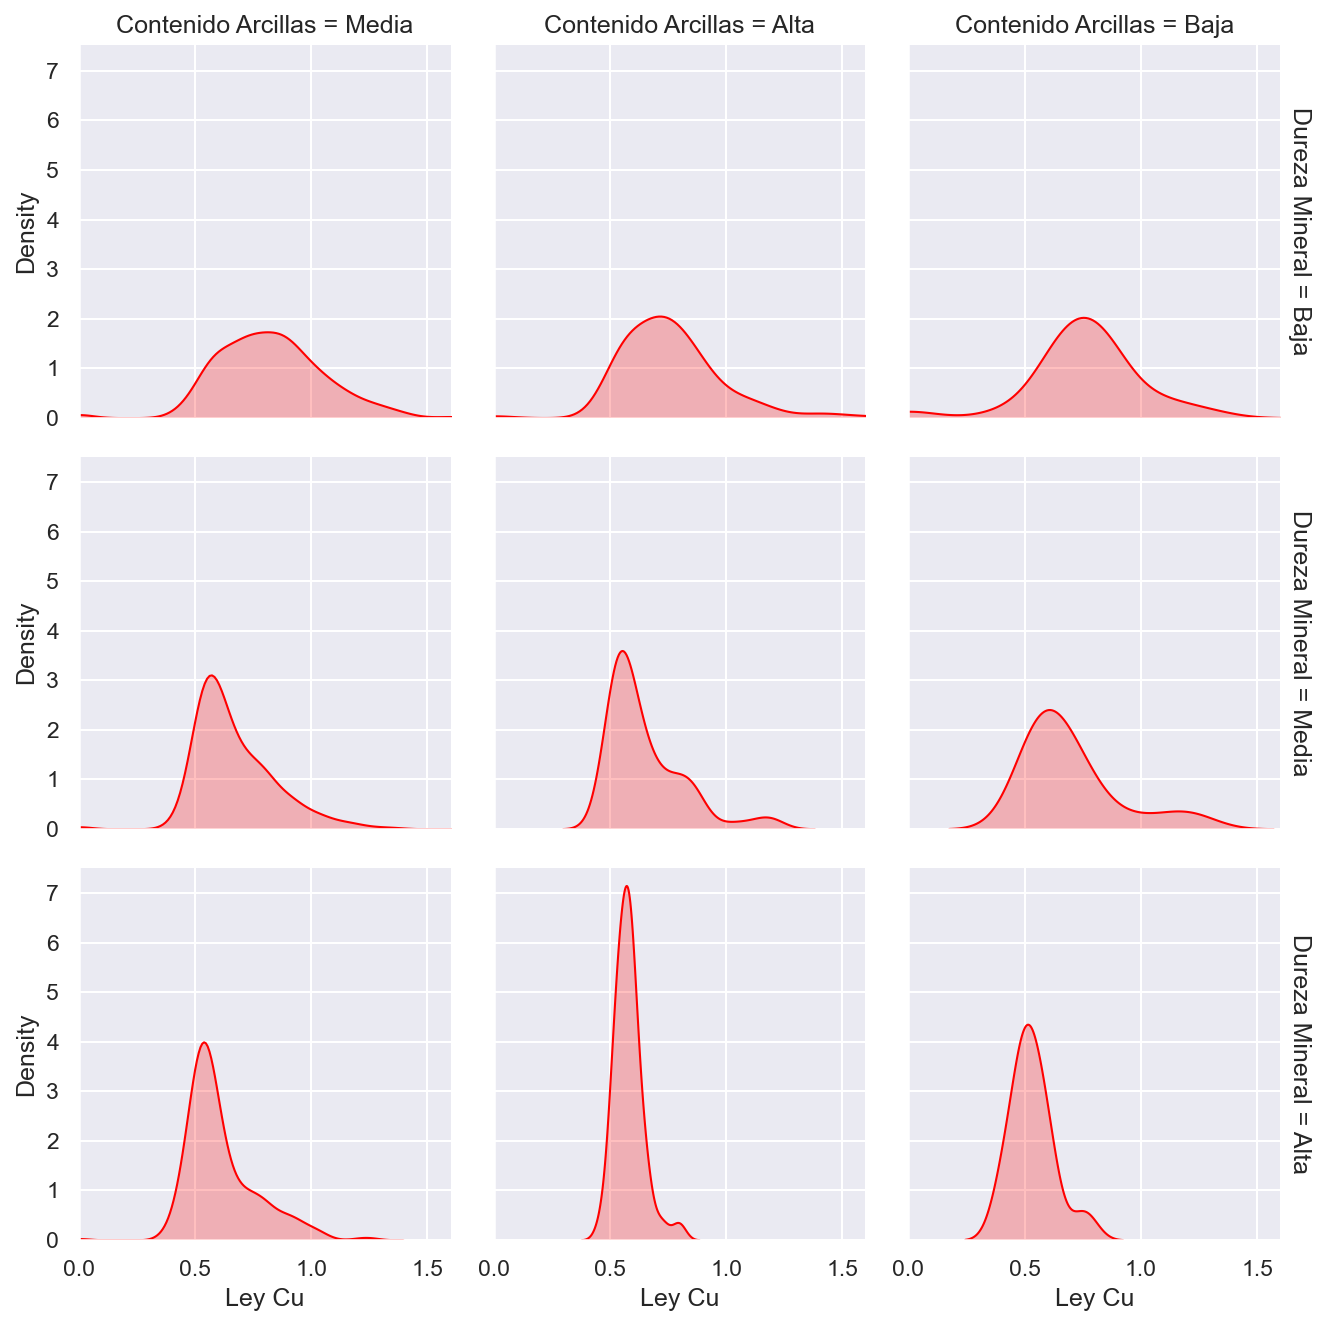

In [23]:
# Otra grilla, de 3x3, usando ambas variables categóricas y con estimaciones de densidad.
grid = sns.FacetGrid(data, row="Dureza Mineral", col="Contenido Arcillas", margin_titles=True, xlim=(0, 1.6))
grid.map(sns.kdeplot, "Ley Cu", fill=True, color="red");

◼︎

## Mapas de calor.
Otro recurso muy útil provisto por **Seaborn** corresponde a los mapas de calor, los que permiten representar las variaciones relativas de una grilla de valores numéricos mediante un esquema de colores adecuado. Son especialmente útiles en contextos de páginas web, para caracterizar niveles de actividad, interacción de usuarios u otros conceptos similares. De hecho, Github nos muestra por defecto un mapa de calor relativo a las contribuciones que realizamos sobre nuestro repositorios.

En general, una estructura de datos interesante de mostrar mediante un mapa de calor corresponde a la matriz de correlación entre un conjunto de variables que, en un principio, suponemos independientes, ya que una visualización de este tipo nos permitirá reconocer inmediatamente qué variables presentan una alta correlación con respecto a otras en el mismo conjunto de datos, permitiéndonos realizar una selección de atributos (por ejemplo, previo a la construcción de un modelo) que reduce redundancias entre ellos.

Para construir un mapa de calor usamos la función `sns.heatmap()`. Como en el caso del resto de las funciones de **Seaborn** que hemos estudiado, `sns.heatmap()` reconoce inmediatamente si la estructura de datos imputada es un arreglo de **Numpy** o un DataFrame de **Pandas**, y en el caso de éste último, puede hacer uso de sus rótulos de columnas y filas para complementar nuestro gráfico.

**Ejemplo 4.2 - Visualización de una matriz de correlación:** Vamos a ejemplificar el uso de los mapas de calor usando un conjunto de datos asociados a una operación ficticia de desarrollo de un túnel, donde cada una de las filas de dicho conjunto corresponde a una parada o secuencia de avance del mismo. Cada columna hace referencia a aspectos importantes relativas a cada parada, como la masa de explosivos utilizada, el número promedio de tiros por diagrama de disparo en cada avance, longitud promedio de las perforaciones, resistencia a la compresión uniaxial estimada para el macizo rocoso en el entorno donde se realiza cada parada (UCS), módulo de deformación y razón de Poisson asociados a ese mismo macizo rocoso, volumen extraído de roca por avance, índice geológico de calidad de ese macizo rocoso (GSI), anisotropía radial (razón entre los esfuerzos principales mayor y menor en la sección transversal del túnel en cada parada) y energía potencial de deformación (EPD).

Partimos pues accediendo a nuestra data, la que se encuentra en el archivo `tunnel_progression.csv`:

In [24]:
# Accedemos a la data.
data = pd.read_csv("datasets/tunnel_progression.csv", sep=";")

In [25]:
# Observamos las primeras filas de esta data.
data.head(n=10)

,Parada,Longitud perfo.,Nº tiros av.,Masa explos.,UCS estim.,Mod. Young,Raz. Poisson,Vol. extraido,GSI,Anisotropia radial,EPD
0,1,2.5,103,235.6350,189,57,0.27,190.224291,50.0,2.073532,5073.729096
1,2,3.8,91,230.4545,189,57,0.27,172.409574,50.0,2.074479,4599.041707
2,3,3.8,82,238.0370,189,57,0.27,140.738336,52.5,2.075268,3754.536433
3,4,3.8,89,248.9340,189,57,0.27,148.312410,60.0,2.076219,3956.990959
4,5,3.8,89,246.4360,189,57,0.27,148.165582,52.5,2.077169,3953.482527
5,6,3.8,89,213.3095,189,57,0.27,118.775063,60.0,2.077952,3169.574623
6,7,3.2,94,262.3940,189,57,0.27,204.922318,52.5,2.079090,5469.747613
7,8,3.2,109,253.3975,189,57,0.27,195.808166,55.0,2.080134,5227.620816
8,9,3.8,113,280.1260,189,57,0.27,203.991199,52.5,2.080922,5449.128926
9,10,3.0,111,207.8650,189,57,0.27,154.256375,55.0,2.081128,4124.648261


In [26]:
# Indexamos este DataFrame con respecto al número de paradas.
data.set_index("Parada", inplace=True)

Recordemos que, para cualquier DataFrame, es posible calcular rápidamente la correspondiente matriz de correlación por medio del método `corr()`:

In [27]:
# Calculamos la matriz de correlación.
corr = data.corr()

Y ahora procedemos a construir nuestro mapa de calor. Notemos que, en el caso de la función `sns.heatmap()`, el parámetro `cbar` nos permite determinar (mediante un valor Booleano) si nuestro mapa de calor llevará adjunta una barra de calor que referencie los valores mapeados por el mapa de colores escogido para representar nuestra data, usando a su vez el parámetro `cmap`, y que acepta los mismos mapas de color que **Matplotlib**. El parámetro `cbar_kws` es un diccionario que permite especificar parámetros relativos a la barra de color; en nuestro caso, simplemente establecemos el rótulo de dicha barra mediante el parámetro `label`. Finalmente, el parámetro Booleano `square` nos permite establecer si cada posición en el mapa de calor será representada por un cuadrado o no:

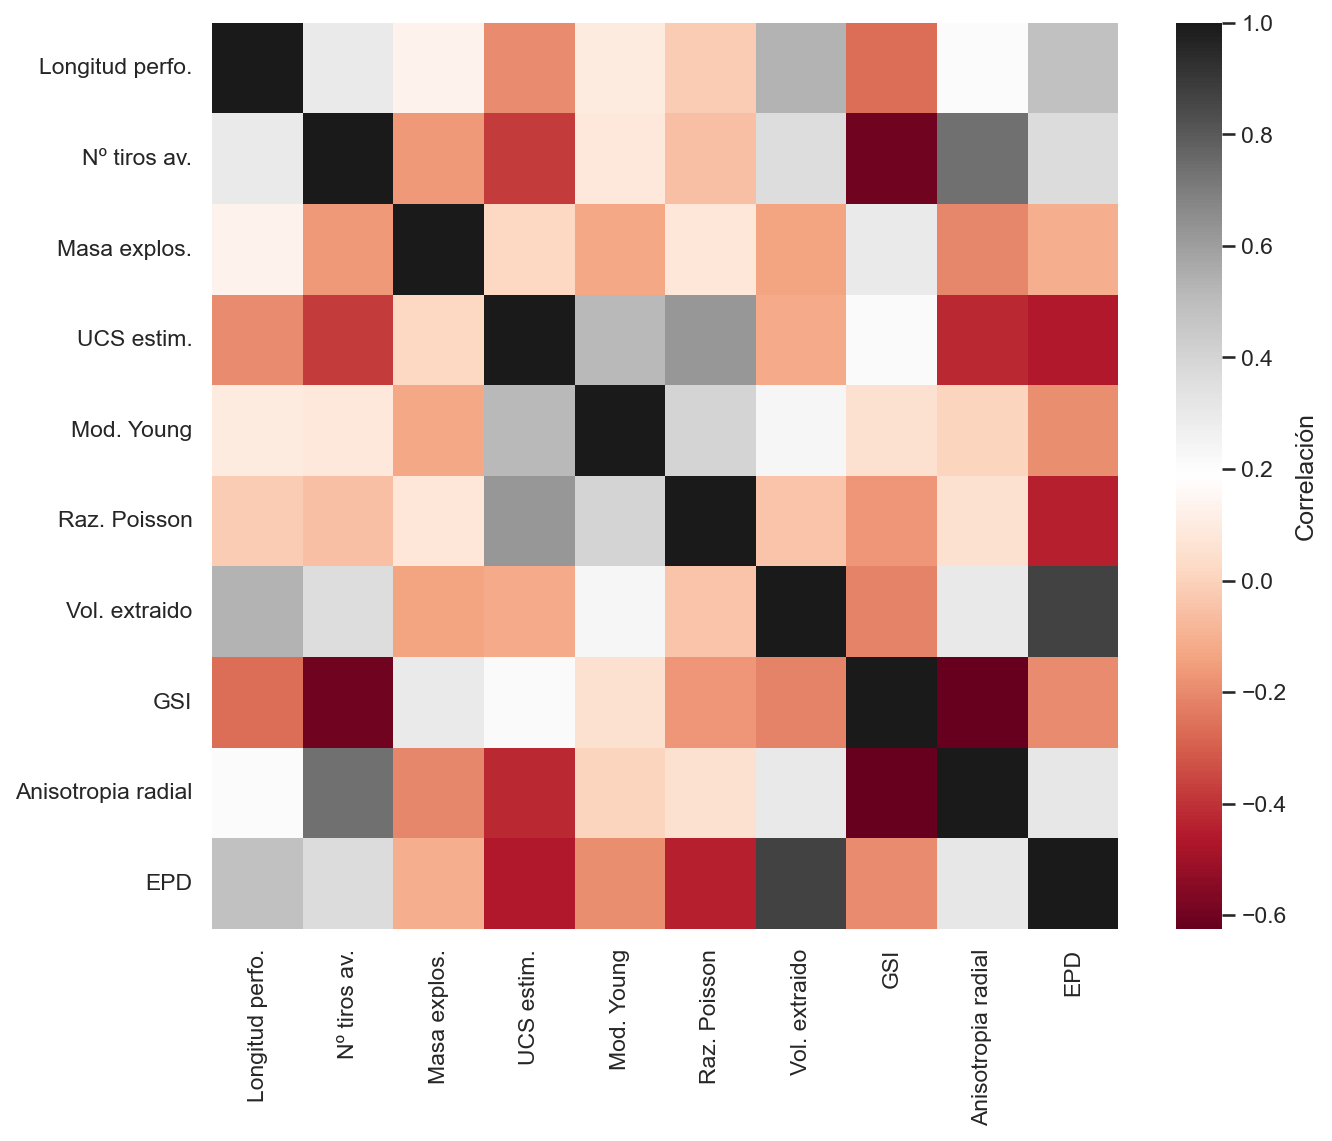

In [28]:
# Graficamos esta matriz usando un mapa de calor.
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cbar=True, cbar_kws={"label": "Correlación"}, square=True, cmap="RdGy", ax=ax);

Debido a que la matriz de correlación es de hecho una matriz simétrica, solamente estamos interesados en observar el comportamiento de los valores de la correlación debajo (o arriba, da igual) de la diagonal principal, cuyo valor siempre es igual a 1 (ya que se corresponde con la correlación de una variable consigo misma). Dado el mapa de color escogido (`RdGy`), es evidente que las mayores magnitudes de correlación estarán asociadas a colores más rojos en el caso negativo, y negros en el caso positivo, mientras que las magnitudes menores estarán asociadas a colores más claros.

Podemos observar que, para nuestro conjunto de datos, existe una alta correlación negativa entre el GSI y la anisotropía radial. Si bien estas variables, en estricto rigor, no son linealmente dependientes, sí permiten expresar qué podemos esperar en relación al comportamiento mecánico del macizo rocoso en razón de su blocosidad y su eventual distribución de esfuerzos. Por esa razón, su correlación resulta ser alta en magnitud.

Existen otros valores de correlación que pueden ser resultado de la coincidencia más que de algún fenómeno inherente al proceso de construir el túnel. Por ejemplo, la alta magnitud de correlación entre GSI y número de tiros de avance por parada.

Existen otras opciones de personalización de nuestros mapas de calor. Por ejemplo, podemos usar el parámetro Booleano `annot` para definir si queremos que el valor asociado al color de nuestro mapa aparezca en cada cuadro. Podemos complementar estas anotaciones mediante el parámetro `fmt`, que permite formatear dicha anotación en términos del número de cifras significativas a mostrar en cada cuadro:

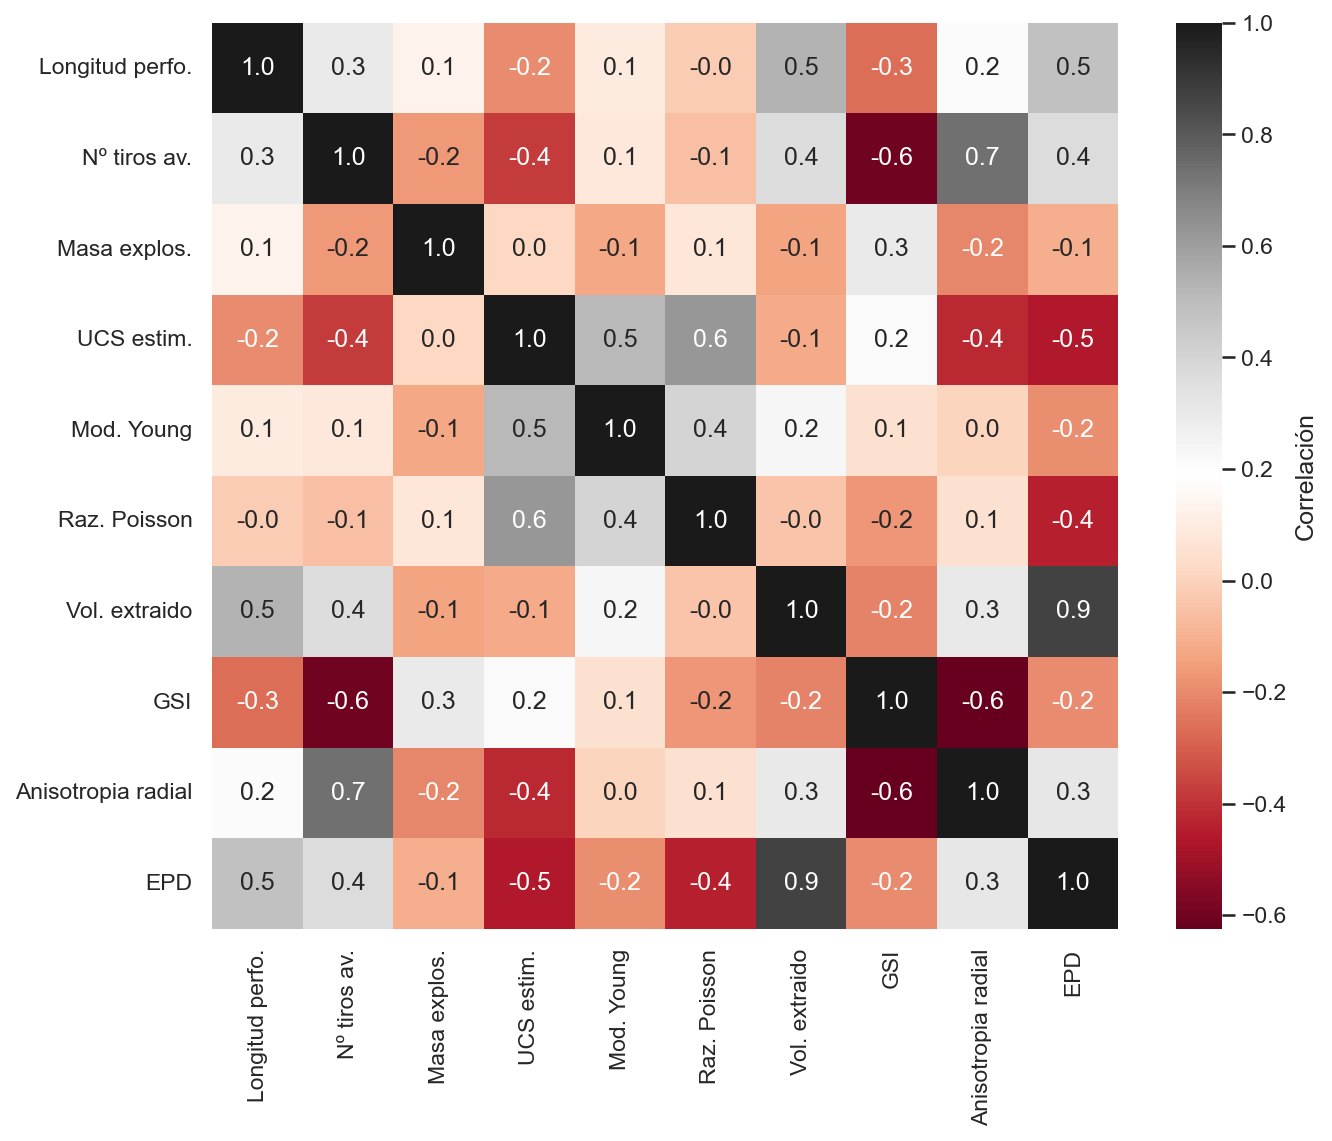

In [29]:
# Activamos las anotaciones.
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    corr, cbar=True, cbar_kws={"label": "Correlación"}, square=True, cmap="RdGy",
    ax=ax, annot=True, fmt=".1f"
);

Podemos incluso añadir línas entre cada cuadro especificando el parámetro `lw` (que es un alias para `linewidth`):

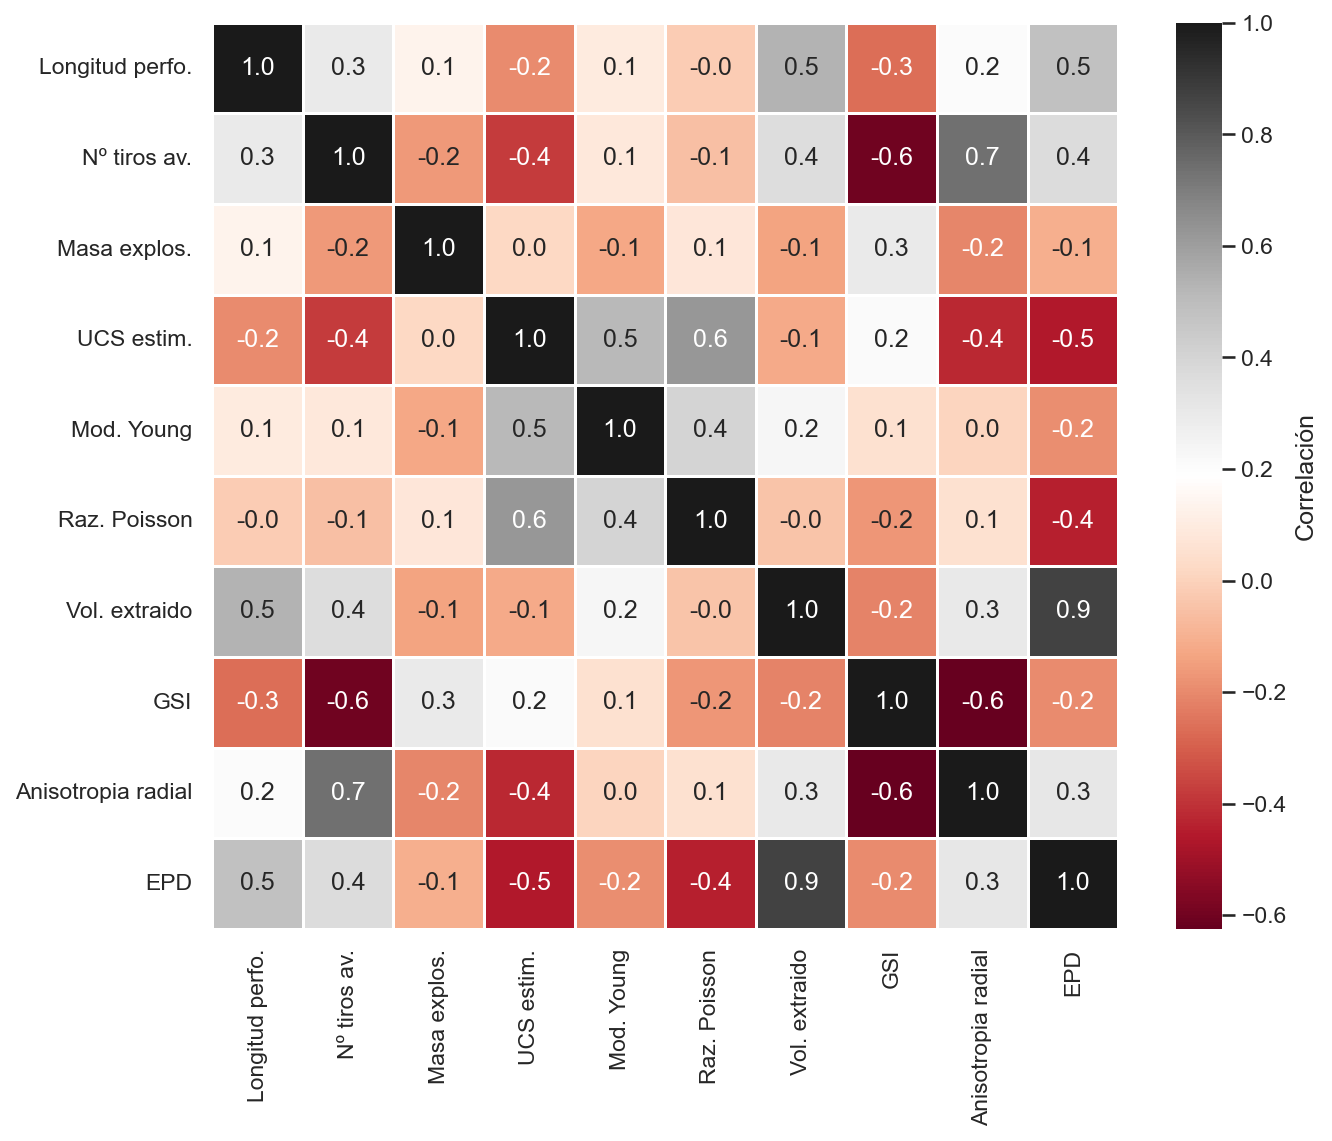

In [30]:
# Líneas de separación entre cuadros.
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    corr, cbar=True, cbar_kws={"label": "Correlación"}, square=True, cmap="RdGy",
    ax=ax, annot=True, fmt=".1f", lw=0.5
);

Notemos que la barra de color situada a la derecha de nuestra matriz de correlación nos indica los valores extremos de correlación que se alcanzan en la matriz. Sin embargo, puesto que tales valores siempre varían en el intervalo $[-1, 1]$, quizás sea buena idea establecer que la barra de color también esté ajustada conforme dicho intervalo. Podemos setear los valores máximos y mínimos a mapear mediante la barra de color usando los parámetros `vmax` y `vmin`, respectivamente:

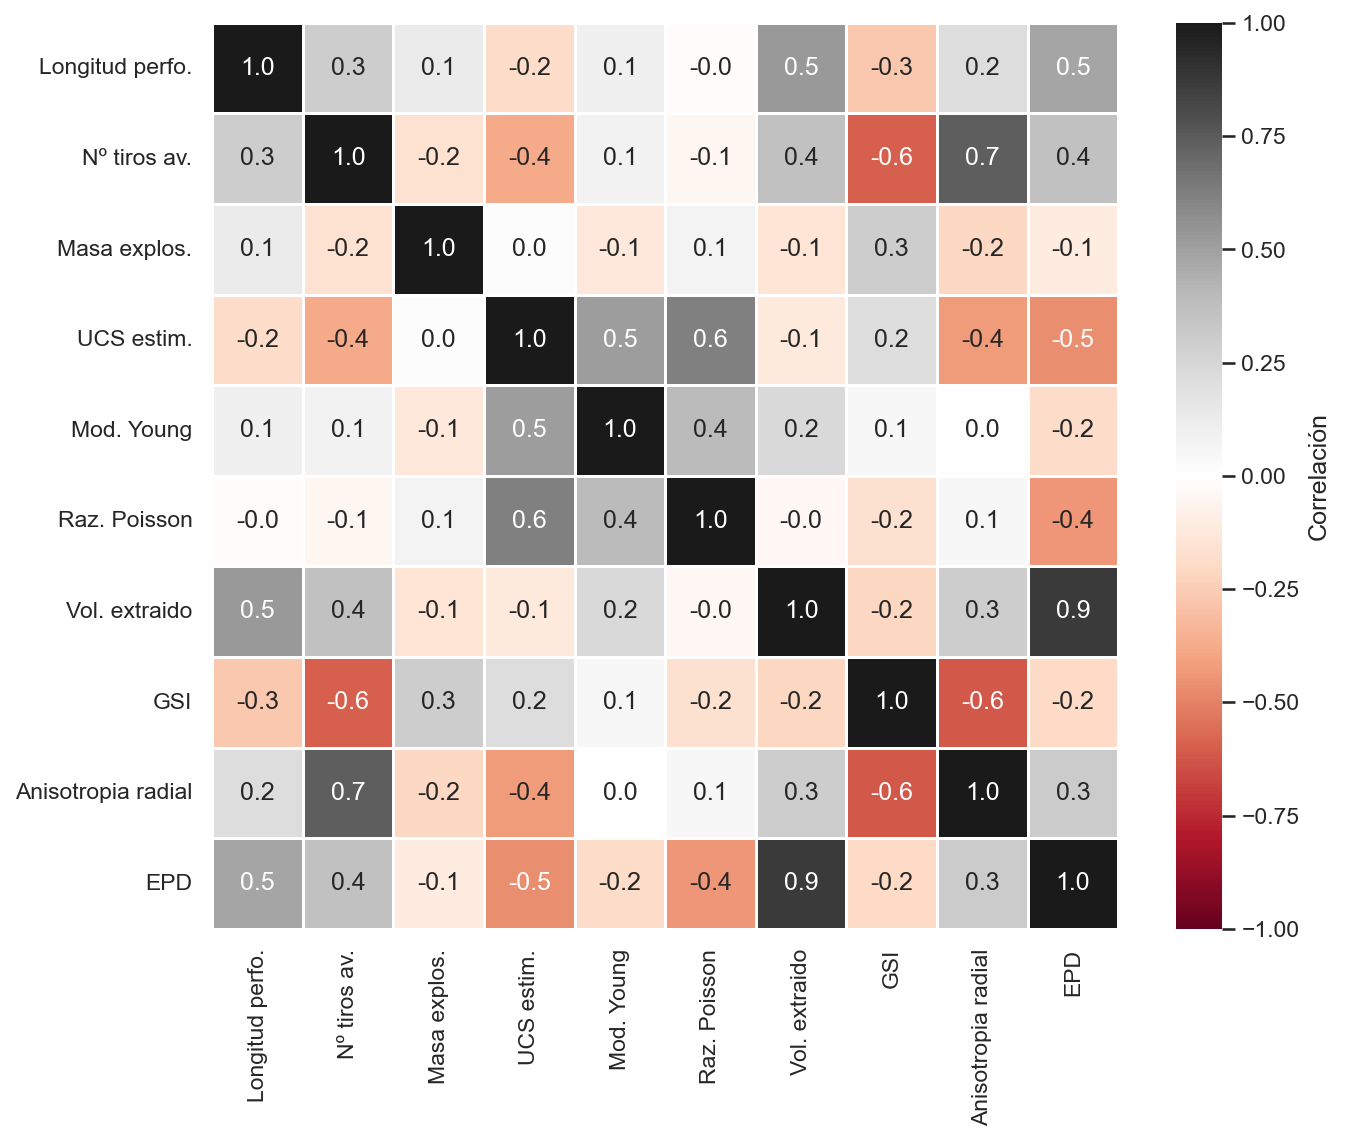

In [31]:
# Fijamos los valores extremos a mapear.
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    corr, cbar=True, cbar_kws={"label": "Correlación"}, square=True, cmap="RdGy",
    ax=ax, annot=True, fmt=".1f", lw=0.5, vmin=-1, vmax=1
);

Con estos cambios, hemos logrado una visualización más limpia y que no nos hace *creer* que hay correlaciones de mayor magnitud de las que realmente hay (como en el caso de las correlaciones negativas). ◼︎

## Comentarios finales.
**Seaborn** es una librería con una enorme cantidad de opciones por descrubir, y que siempre podremos revisar en su [documentación oficial](https://seaborn.pydata.org/tutorial.html). Lo que hemos visto acá es sólo una pequeña muestra de lo que podemos hacer con sólo unas cuantas líneas de código y que, definitivamente, debíamos agregar a nuestra caja de herramientas.

Con esto, damos por finalizado todo lo relativo a la construcción de gráficos... al menos por ahora. Sólo nos resta explorar algunas opciones más avanzadas de análisis mediante el uso de la librería científica de Python, llamada **Scipy**, y con la cual daremos por finalizada nuestra aventura en el mundo del análisis de datos con Python aplicado a la minería. No obstante, con todo lo que hemos aprendido, ya disponemos de un montón de buenas herramientas con los cuales podemos hacerle frente a una cantidad gigante de problemas típicos del análisis de datos ¡Sólo nos resta practicar lo que hemos aprendido!